# Analysis of differences with different gene to disease sources

## Load all associations from multiple sources

The mondo-g2d input spec includes metadata about where to download

- gencc
- medgen_mim2gene
- hpoa_g2d

Note these use heterogeneous IDs, the spec includes normalizers for these

In [1]:
from oaklib import get_adapter

In [2]:
from oaklib.conf import CONF_DIR_PATH
adapter = get_adapter(CONF_DIR_PATH/ "mondo-g2d-input-spec.yaml")

In [3]:
associations = list(adapter.associations())

In [4]:
len(associations)

106577

In [5]:
from linkml_runtime.dumpers import json_dumper

In [6]:
import pandas as pd

In [7]:
def _as_dict(a):
    obj = json_dumper.to_dict(a)
    obj["subject_prefix"] = a.subject.split(":")[0]
    obj["object_prefix"] = a.object.split(":")[0]
    return obj

In [8]:
df = pd.DataFrame([_as_dict(a) for a in associations])
df.to_csv("g2d.tsv", sep="\t", index=False)

In [9]:
df

,subject,predicate,object,primary_knowledge_source,aggregator_knowledge_source,original_object,original_subject,subject_prefix,object_prefix,subject_label,object_label
0,HGNC:1952,biolink:gene_associated_with_condition,MONDO:0007032,infores:medgen_mim_g2d,infores:medgen_mim_g2d,OMIM:100100,NCBIGene:1131,HGNC,MONDO,NaN,NaN
1,HGNC:29216,biolink:gene_associated_with_condition,MONDO:0024506,infores:medgen_mim_g2d,infores:medgen_mim_g2d,OMIM:100300,NCBIGene:57514,HGNC,MONDO,NaN,NaN
2,HGNC:3690,biolink:gene_associated_with_condition,MONDO:0007037,infores:medgen_mim_g2d,infores:medgen_mim_g2d,OMIM:100800,NCBIGene:2261,HGNC,MONDO,NaN,NaN
3,HGNC:7773,biolink:gene_associated_with_condition,MONDO:0007039,infores:medgen_mim_g2d,infores:medgen_mim_g2d,OMIM:101000,NCBIGene:4771,HGNC,MONDO,NaN,NaN
4,HGNC:3689,biolink:gene_associated_with_condition,MONDO:0007041,infores:medgen_mim_g2d,infores:medgen_mim_g2d,OMIM:101200,NCBIGene:2263,HGNC,MONDO,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
106572,HGNC:12762,NaN,MONDO:0013673,GENCC:000110,infores:gencc,NaN,NaN,HGNC,MONDO,WFS1,Wolfram-like syndrome
106573,HGNC:12762,NaN,MONDO:0013673,GENCC:000102,infores:gencc,NaN,NaN,HGNC,MONDO,WFS1,Wolfram-like syndrome
106574,HGNC:12762,NaN,MONDO:0013673,GENCC:000101,infores:gencc,NaN,NaN,HGNC,MONDO,WFS1,Wolfram-like syndrome
106575,HGNC:29271,NaN,MONDO:0030491,ftp://ftp.ncbi.nlm.nih.gov/gene/DATA/mim2gene_...,infores:hpoa,OMIM:619644,NCBIGene:57169,HGNC,MONDO,ZNFX1,NaN


In [10]:
df.query("object == 'MONDO:0008426'")

,subject,predicate,object,primary_knowledge_source,aggregator_knowledge_source,original_object,original_subject,subject_prefix,object_prefix,subject_label,object_label
699,HGNC:10896,biolink:gene_associated_with_condition,MONDO:0008426,infores:medgen_mim_g2d,infores:medgen_mim_g2d,OMIM:182212,NCBIGene:6497,HGNC,MONDO,NaN,NaN
15644,HGNC:10896,NaN,MONDO:0008426,ftp://ftp.ncbi.nlm.nih.gov/gene/DATA/mim2gene_...,infores:hpoa,OMIM:182212,NCBIGene:6497,HGNC,MONDO,SKI,NaN
15645,HGNC:10896,NaN,MONDO:0008426,http://www.orphadata.org/data/xml/en_product6.xml,infores:hpoa,Orphanet:2462,NCBIGene:6497,HGNC,MONDO,SKI,NaN
15646,HGNC:10896,NaN,MONDO:0008426,GENCC:000101,infores:gencc,NaN,NaN,HGNC,MONDO,SKI,Shprintzen-Goldberg syndrome
15647,HGNC:10896,NaN,MONDO:0008426,GENCC:000112,infores:gencc,NaN,NaN,HGNC,MONDO,SKI,Shprintzen-Goldberg syndrome
...,...,...,...,...,...,...,...,...,...,...,...
104537,HGNC:10896,NaN,MONDO:0008426,GENCC:000111,infores:gencc,NaN,NaN,HGNC,MONDO,SKI,Shprintzen-Goldberg syndrome
104538,HGNC:10896,NaN,MONDO:0008426,GENCC:000104,infores:gencc,NaN,NaN,HGNC,MONDO,SKI,Shprintzen-Goldberg syndrome
104539,HGNC:10896,NaN,MONDO:0008426,GENCC:000106,infores:gencc,NaN,NaN,HGNC,MONDO,SKI,Shprintzen-Goldberg syndrome
104540,HGNC:10896,NaN,MONDO:0008426,GENCC:000110,infores:gencc,NaN,NaN,HGNC,MONDO,SKI,Shprintzen-Goldberg syndrome


In [11]:
df.query("aggregator_knowledge_source == 'infores:hpoa'")

,subject,predicate,object,primary_knowledge_source,aggregator_knowledge_source,original_object,original_subject,subject_prefix,object_prefix,subject_label,object_label
5907,HGNC:16391,NaN,MONDO:0008905,ftp://ftp.ncbi.nlm.nih.gov/gene/DATA/mim2gene_...,infores:hpoa,OMIM:212050,NCBIGene:64170,HGNC,MONDO,CARD9,NaN
5908,HGNC:16391,NaN,MONDO:0008905,http://www.orphadata.org/data/xml/en_product6.xml,infores:hpoa,Orphanet:457088,NCBIGene:64170,HGNC,MONDO,CARD9,NaN
5911,HGNC:21066,NaN,MONDO:0009544,ftp://ftp.ncbi.nlm.nih.gov/gene/DATA/mim2gene_...,infores:hpoa,OMIM:248000,NCBIGene:51256,HGNC,MONDO,TBC1D7,NaN
5915,HGNC:14313,NaN,MONDO:0033485,ftp://ftp.ncbi.nlm.nih.gov/gene/DATA/mim2gene_...,infores:hpoa,OMIM:617895,NCBIGene:28981,HGNC,MONDO,IFT81,NaN
5916,HGNC:6742,NaN,MONDO:0014693,ftp://ftp.ncbi.nlm.nih.gov/gene/DATA/mim2gene_...,infores:hpoa,OMIM:616564,NCBIGene:8216,HGNC,MONDO,LZTR1,NaN
...,...,...,...,...,...,...,...,...,...,...,...
106562,HGNC:12731,NaN,MONDO:0010294,ftp://ftp.ncbi.nlm.nih.gov/gene/DATA/mim2gene_...,infores:hpoa,OMIM:300299,NCBIGene:7454,HGNC,MONDO,WAS,NaN
106563,HGNC:12731,NaN,MONDO:0010294,http://www.orphadata.org/data/xml/en_product6.xml,infores:hpoa,Orphanet:86788,NCBIGene:7454,HGNC,MONDO,WAS,NaN
106567,HGNC:12762,NaN,MONDO:0013673,ftp://ftp.ncbi.nlm.nih.gov/gene/DATA/mim2gene_...,infores:hpoa,OMIM:614296,NCBIGene:7466,HGNC,MONDO,WFS1,NaN
106568,HGNC:12762,NaN,MONDO:0013673,http://www.orphadata.org/data/xml/en_product6.xml,infores:hpoa,Orphanet:411590,NCBIGene:7466,HGNC,MONDO,WFS1,NaN


In [12]:
df.groupby(["subject", "object"])["aggregator_knowledge_source"].describe()

count unique                     top freq
subject            object                                                 
HGNC:10001         MONDO:0007781     4      2            infores:hpoa    2
HGNC:10004         MONDO:0012033    50      3           infores:gencc   35
HGNC:10006         MONDO:0008493    17      3            infores:hpoa    8
                   MONDO:0019107    10      3            infores:hpoa    6
HGNC:10008         MONDO:0019107     4      2            infores:hpoa    2
...                                ...    ...                     ...  ...
NCBIGene:105259599 MONDO:0020796     2      2  infores:medgen_mim_g2d    1
NCBIGene:109580095 MONDO:0013517     2      2  infores:medgen_mim_g2d    1
NCBIGene:111365204 MONDO:0007630     2      2  infores:medgen_mim_g2d    1
                   MONDO:0010932     2      2  infores:medgen_mim_g2d    1
NCBIGene:7467      MONDO:0008684     2      2  infores:medgen_mim_g2d    1

[15696 rows x 4 columns]

In [13]:
df.groupby(["subject_prefix", "object_prefix"])["aggregator_knowledge_source"].describe()

count unique                     top   freq
subject_prefix object_prefix                                              
HGNC           MONDO          105710      3           infores:gencc  60057
               OMIM              719      2            infores:hpoa    405
               Orphanet          132      1            infores:hpoa    132
NCBIGene       MONDO              16      2  infores:medgen_mim_g2d      8

In [14]:
df.groupby(["subject_prefix", "object_prefix", "aggregator_knowledge_source"]).describe()

subject         \
                                                           count unique   
subject_prefix object_prefix aggregator_knowledge_source                  
HGNC           MONDO         infores:gencc                 60057   4753   
                             infores:hpoa                  40068   5128   
                             infores:medgen_mim_g2d         5585   3933   
               OMIM          infores:hpoa                    405    385   
                             infores:medgen_mim_g2d          314    305   
               Orphanet      infores:hpoa                    132    111   
NCBIGene       MONDO         infores:hpoa                      8      5   
                             infores:medgen_mim_g2d            8      5   

                                                                              \
                                                                         top   
subject_prefix object_prefix aggregator_knowledge_source                       
HGNC           MONDO         infores:gencc                         HGNC:3690   
                             infores:hpoa                          HGNC:2200   
                             infores:medgen_mim_g2d                HGNC:2200   
               OMIM          infores:hpoa                          HGNC:4398   
                             infores:medgen_mim_g2d               HGNC:18420   
               Orphanet      infores:hpoa                          HGNC:7577   
NCBIGene       MONDO         infores:hpoa                 NCBIGene:105259599   
                             infores:medgen_mim_g2d       NCBIGene:105259599   

                                                              predicate  \
                                                         freq     count   
subject_prefix object_prefix aggregator_knowledge_source                  
HGNC           MONDO         infores:gencc                246         0   
                             infores:hpoa                 130         0   
                             infores:medgen_mim_g2d        14      5585   
               OMIM          infores:hpoa                   2         0   
                             infores:medgen_mim_g2d         2       314   
               Orphanet      infores:hpoa                   2         0   
NCBIGene       MONDO         infores:hpoa                   3         0   
                             infores:medgen_mim_g2d         3         8   

                                                                 \
                                                         unique   
subject_prefix object_prefix aggregator_knowledge_source          
HGNC           MONDO         infores:gencc                    0   
                             infores:hpoa                     0   
                             infores:medgen_mim_g2d           1   
               OMIM          infores:hpoa                     0   
                             infores:medgen_mim_g2d           1   
               Orphanet      infores:hpoa                     0   
NCBIGene       MONDO         infores:hpoa                     0   
                             infores:medgen_mim_g2d           1   

                                                                                                  \
                                                                                             top   
subject_prefix object_prefix aggregator_knowledge_source                                           
HGNC           MONDO         infores:gencc                                                   NaN   
                             infores:hpoa                                                    NaN   
                             infores:medgen_mim_g2d       biolink:gene_associated_with_condition   
               OMIM          infores:hpoa                                                    NaN   
                             infores:medgen_mim_g2d       biolink:gene_associated_with

In [15]:
df.sort_values(["subject", "object"])

,subject,predicate,object,primary_knowledge_source,aggregator_knowledge_source,original_object,original_subject,subject_prefix,object_prefix,subject_label,object_label
16423,HGNC:10001,NaN,MONDO:0007781,ftp://ftp.ncbi.nlm.nih.gov/gene/DATA/mim2gene_...,infores:hpoa,OMIM:145500,NCBIGene:8490,HGNC,MONDO,RGS5,NaN
16424,HGNC:10001,NaN,MONDO:0007781,GENCC:000106,infores:gencc,NaN,NaN,HGNC,MONDO,RGS5,"essential hypertension, genetic"
47487,HGNC:10001,NaN,MONDO:0007781,ftp://ftp.ncbi.nlm.nih.gov/gene/DATA/mim2gene_...,infores:hpoa,OMIM:145500,NCBIGene:8490,HGNC,MONDO,RGS5,NaN
47488,HGNC:10001,NaN,MONDO:0007781,GENCC:000106,infores:gencc,NaN,NaN,HGNC,MONDO,RGS5,"essential hypertension, genetic"
2684,HGNC:10004,biolink:gene_associated_with_condition,MONDO:0012033,infores:medgen_mim_g2d,infores:medgen_mim_g2d,OMIM:608415,NCBIGene:8787,HGNC,MONDO,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7192,NCBIGene:111365204,NaN,MONDO:0007630,ftp://ftp.ncbi.nlm.nih.gov/gene/DATA/mim2gene_...,infores:hpoa,OMIM:136550,NaN,NCBIGene,MONDO,-,NaN
2108,NCBIGene:111365204,biolink:gene_associated_with_condition,MONDO:0010932,infores:medgen_mim_g2d,infores:medgen_mim_g2d,OMIM:600790,NaN,NCBIGene,MONDO,NaN,NaN
9063,NCBIGene:111365204,NaN,MONDO:0010932,ftp://ftp.ncbi.nlm.nih.gov/gene/DATA/mim2gene_...,infores:hpoa,OMIM:600790,NaN,NCBIGene,MONDO,-,NaN
817,NCBIGene:7467,biolink:gene_associated_with_condition,MONDO:0008684,infores:medgen_mim_g2d,infores:medgen_mim_g2d,OMIM:194190,NaN,NCBIGene,MONDO,NaN,NaN


In [16]:
df.groupby("primary_knowledge_source")[["subject", "object"]].count()

,subject,object
primary_knowledge_source,,
GENCC:000101,9974,9974
GENCC:000102,5687,5687
GENCC:000104,4952,4952
GENCC:000105,1365,1365
GENCC:000106,9101,9101
GENCC:000107,1145,1145
GENCC:000108,767,767
GENCC:000110,16407,16407
GENCC:000111,3624,3624


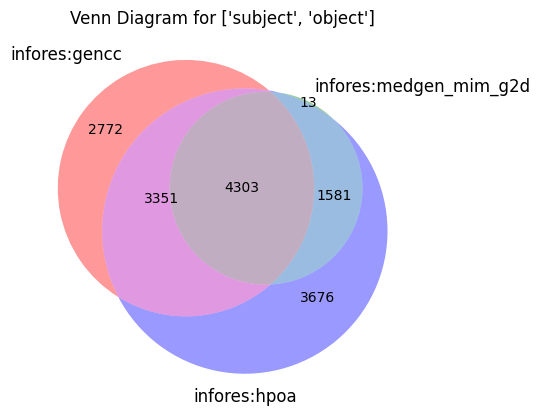

In [42]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn3

s1 = "infores:gencc"
s2 = "infores:medgen_mim_g2d"
s3 = "infores:hpoa"
src_col = "aggregator_knowledge_source"

def make_src_tuples(cols, venn_df):
    if venn_df is None:
        venn_df = df
    source1_tuples = set(venn_df[venn_df[src_col] == s1][cols].apply(tuple, axis=1))
    source2_tuples = set(venn_df[venn_df[src_col] == s2][cols].apply(tuple, axis=1))
    source3_tuples = set(venn_df[venn_df[src_col] == s3][cols].apply(tuple, axis=1))
    return source1_tuples, source2_tuples, source3_tuples

def make_venn(cols, venn_df=None):
    ts1, ts2, ts3 = make_src_tuples(cols, venn_df)
    venn3([ts1, ts2, ts3], set_labels=(s1, s2, s3))
    plt.title(f"Venn Diagram for {cols}")
    plt.show()


make_venn(["subject", "object"])

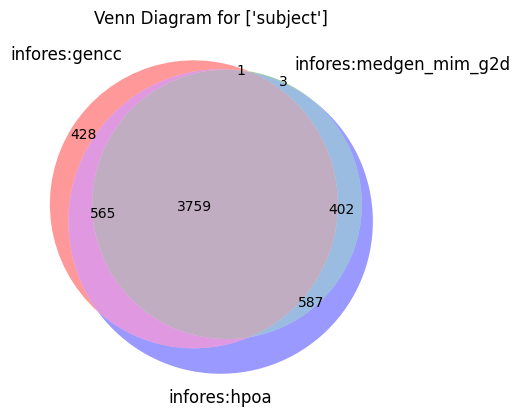

In [26]:
make_venn(["subject"])

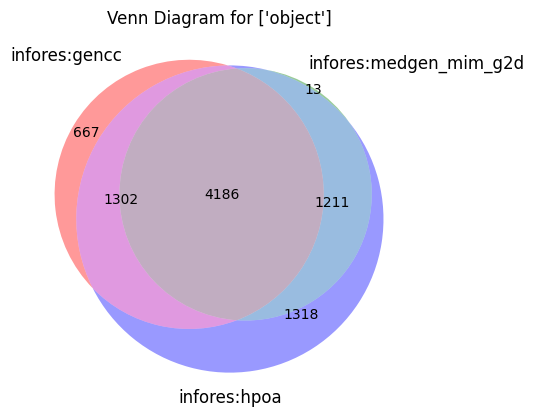

In [27]:
make_venn(["object"])

In [28]:
diseases = set(df["object"])
len(diseases)

8697

## Controlling for redundancy

Doe to the fact that Mondo allows for annotation at multiple levels it opens the possibility of
redundant annotations, or annotations that are too broad.

We first find all disease ids used in annotation that are proper ancestors of other disease ids

In [33]:
from oaklib.datamodels.vocabulary import IS_A

def _id_label(d) -> str:
    lbl = adapter.label(d)
    return f"{d} {lbl}" if lbl else d

redundant = set()
roll_up_map = {}
roll_up_items = []
for d in diseases:
    ancs = adapter.ancestors(d, predicates=[IS_A], reflexive=False)
    ixn = diseases.intersection(ancs)
    redundant.update(ixn)
    if ixn:
        roll_up_map[d] = list(ixn)
        roll_up_item = {"disease": _id_label(d)}
        for i, p in enumerate(ixn):
            roll_up_item[f"parent_{i}"] = _id_label(p)
        roll_up_items.append(roll_up_item)
    else:
        roll_up_map[d] = [d]

len(redundant)

1092

In [34]:
rollup_df = pd.DataFrame(roll_up_items)
rollup_df

,disease,parent_0,parent_1,parent_2,parent_3,parent_4,parent_5,parent_6,parent_7,parent_8,parent_9,parent_10,parent_11,parent_12,parent_13,parent_14,parent_15
0,MONDO:0007142 Townes-Brocks syndrome,MONDO:0019042 multiple congenital anomalies/dy...,MONDO:0005172 skeletal system disorder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MONDO:0018088 familial Mediterranean fever,MONDO:0005046 immune system disorder,MONDO:0003900 connective tissue disorder,MONDO:0005240 kidney disorder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MONDO:0029148 spermatogenic failure 34,MONDO:0005372 male infertility,MONDO:0004983 spermatogenic failure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MONDO:0030981 immunodeficiency 79,MONDO:0005046 immune system disorder,MONDO:0021094 immunodeficiency disease,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MONDO:0009658 mucopolysaccharidosis type 3D,MONDO:0018937 mucopolysaccharidosis type 3,MONDO:0002561 lysosomal storage disease,MONDO:0005172 skeletal system disorder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6578,MONDO:0014026 congenital stationary night blin...,MONDO:0016293 congenital stationary night blin...,MONDO:0005283 retinal disorder,MONDO:0005071 nervous system disorder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6579,MONDO:0054722 geleophysic dysplasia 3,MONDO:0005172 skeletal system disorder,MONDO:0000127 geleophysic dysplasia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6580,MONDO:0007495 dystonia 5,MONDO:0100184 GTP cyclohydrolase I deficiency,MONDO:0044807 inherited dystonia,MONDO:0005395 movement disorder,MONDO:0005071 nervous system disorder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6581,MONDO:0016485 Usher syndrome type 3,MONDO:0005283 retinal disorder,MONDO:0019200 retinitis pigmentosa,MONDO:0019118 inherited retinal dystrophy,MONDO:0005071 nervous system disorder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's see an example of an annotation to a broad term:

In [36]:
df.query("object=='MONDO:0005172'")

,subject,predicate,object,primary_knowledge_source,aggregator_knowledge_source,original_object,original_subject,subject_prefix,object_prefix,subject_label,object_label,object_rollup
94627,HGNC:10848,NaN,MONDO:0005172,GENCC:000101,infores:gencc,NaN,NaN,HGNC,MONDO,SHH,skeletal system disorder,"(MONDO:0005172,)"


## Most of the "unique" gencc annotations are to broad terms

TODO: we don't truly filter redundant annotations here

In [44]:
df['object_rollup'] = df['object'].map(lambda x: tuple(sorted(roll_up_map[x])))
df['is_redundant'] = df['object'].map(lambda x: x in redundant)
nr_df = df.query("is_redundant==False")

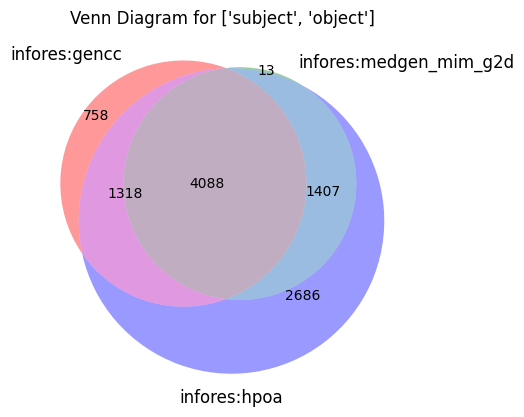

In [45]:
make_venn(["subject", "object"], nr_df)

In [46]:
ts1, ts2, ts3 = make_src_tuples(["subject", "object"], nr_df)

In [50]:
hpoa_unique = ts3.difference(ts1.union(ts2))
# TODO
list(hpoa_unique)[0:10]

[('HGNC:17994', 'MONDO:0007104'),
 ('HGNC:21158', 'MONDO:0013357'),
 ('HGNC:6207', 'MONDO:0017401'),
 ('HGNC:7114', 'Orphanet:650097'),
 ('HGNC:15924', 'MONDO:0016863'),
 ('HGNC:33', 'MONDO:0009971'),
 ('HGNC:2891', 'MONDO:0007316'),
 ('HGNC:9787', 'MONDO:0030330'),
 ('HGNC:20093', 'MONDO:0018834'),
 ('HGNC:8975', 'MONDO:0016216')]

In [52]:
[(g,d) for g,d in hpoa_unique if d.startswith("Orphanet")]

[('HGNC:7114', 'Orphanet:650097'),
 ('HGNC:17085', 'Orphanet:642085'),
 ('HGNC:713', 'Orphanet:751'),
 ('HGNC:21155', 'Orphanet:426'),
 ('HGNC:6473', 'Orphanet:632603'),
 ('HGNC:7782', 'Orphanet:619979'),
 ('HGNC:15992', 'Orphanet:641368'),
 ('HGNC:4593', 'Orphanet:631095'),
 ('HGNC:16716', 'Orphanet:647788'),
 ('HGNC:1160', 'Orphanet:642945'),
 ('HGNC:17095', 'Orphanet:642945'),
 ('HGNC:3444', 'Orphanet:647681'),
 ('HGNC:2212', 'Orphanet:646098'),
 ('HGNC:20001', 'Orphanet:426'),
 ('HGNC:21176', 'Orphanet:642976'),
 ('HGNC:24662', 'Orphanet:641361'),
 ('HGNC:491', 'Orphanet:426'),
 ('HGNC:7488', 'Orphanet:620371'),
 ('HGNC:3775', 'Orphanet:642691'),
 ('HGNC:76', 'Orphanet:643503'),
 ('HGNC:17185', 'Orphanet:353225'),
 ('HGNC:7623', 'Orphanet:647799'),
 ('HGNC:6547', 'Orphanet:406'),
 ('HGNC:8857', 'Orphanet:642954'),
 ('HGNC:1349', 'Orphanet:631106'),
 ('HGNC:2211', 'Orphanet:646113'),
 ('HGNC:2597', 'Orphanet:353225'),
 ('HGNC:1736', 'Orphanet:619363'),
 ('HGNC:3229', 'Orphanet:62036

In [57]:
grouped = df.groupby('object')['subject'].nunique()
grouped = df.groupby('object')['subject'].agg(lambda x: list(set(x))).reset_index()
violations_df = grouped[grouped['subject'].str.len() > 1]
violations_df

,object,subject
0,MONDO:0000023,"[HGNC:21876, HGNC:15625]"
1,MONDO:0000030,"[HGNC:1956, HGNC:1958]"
3,MONDO:0000107,"[HGNC:3176, HGNC:4387, HGNC:9059]"
4,MONDO:0000119,"[HGNC:2897, HGNC:21316, HGNC:19769, HGNC:1987]"
5,MONDO:0000127,"[HGNC:3603, HGNC:14631, HGNC:6716]"
...,...,...
8679,Orphanet:646098,"[HGNC:2212, HGNC:2211, HGNC:2213]"
8680,Orphanet:646113,"[HGNC:2212, HGNC:2211, HGNC:2213]"
8692,Orphanet:648581,"[HGNC:11762, HGNC:4886, HGNC:15598, HGNC:4887]"
8693,Orphanet:650077,"[HGNC:7114, HGNC:4510, HGNC:2907]"


In [68]:
def aggregate_fn(x):
    return {'genes': list(set(x['subject'])), 'sources': list(set(x['aggregator_knowledge_source']))}

grouped_df = nr_df.groupby(['object', 'object_label']).apply(aggregate_fn).reset_index()
expanded_df = pd.concat([grouped_df[['object', 'object_label']], grouped_df[0].apply(pd.Series)], axis=1)
#expanded_df
violations_df = expanded_df[expanded_df['genes'].str.len() > 1]
violations_df

,object,object_label,genes,sources
1,MONDO:0000465,atrioventricular block,"[HGNC:2770, HGNC:6636]",[infores:gencc]
7,MONDO:0000909,Bartter disease type 4B,"[HGNC:2026, HGNC:2027]",[infores:gencc]
10,MONDO:0001197,qualitative platelet defect,"[HGNC:11608, HGNC:55]",[infores:gencc]
13,MONDO:0004955,metabolic syndrome,"[HGNC:4173, HGNC:4174]",[infores:gencc]
14,MONDO:0005058,leiomyosarcoma,"[HGNC:3700, HGNC:9588]",[infores:gencc]
...,...,...,...,...
5041,MONDO:0054737,Fraser syndrome 1,"[HGNC:19185, HGNC:25396]",[infores:gencc]
5056,MONDO:0054802,"erythrocytosis, familial, 7","[HGNC:4824, HGNC:4823]",[infores:gencc]
5119,MONDO:0060760,intellectual developmental disorder with dysmo...,"[HGNC:25099, HGNC:13590]",[infores:gencc]
5133,MONDO:0100101,fetal akinesia deformation sequence 1,"[HGNC:10936, HGNC:26594, HGNC:7525, HGNC:7611,...",[infores:gencc]


In [71]:
violations_df[violations_df['sources'] != "infores:gencc"]

,object,object_label,genes,sources
1,MONDO:0000465,atrioventricular block,"[HGNC:2770, HGNC:6636]",[infores:gencc]
7,MONDO:0000909,Bartter disease type 4B,"[HGNC:2026, HGNC:2027]",[infores:gencc]
10,MONDO:0001197,qualitative platelet defect,"[HGNC:11608, HGNC:55]",[infores:gencc]
13,MONDO:0004955,metabolic syndrome,"[HGNC:4173, HGNC:4174]",[infores:gencc]
14,MONDO:0005058,leiomyosarcoma,"[HGNC:3700, HGNC:9588]",[infores:gencc]
...,...,...,...,...
5041,MONDO:0054737,Fraser syndrome 1,"[HGNC:19185, HGNC:25396]",[infores:gencc]
5056,MONDO:0054802,"erythrocytosis, familial, 7","[HGNC:4824, HGNC:4823]",[infores:gencc]
5119,MONDO:0060760,intellectual developmental disorder with dysmo...,"[HGNC:25099, HGNC:13590]",[infores:gencc]
5133,MONDO:0100101,fetal akinesia deformation sequence 1,"[HGNC:10936, HGNC:26594, HGNC:7525, HGNC:7611,...",[infores:gencc]


In [73]:
violations_df.to_csv("output/g2d-inconsistencies.tsv", sep="\t", index=False)

In [80]:
from collections import defaultdict

def _id_label(d) -> str:
    lbl = adapter.label(d)
    return f"{d} {lbl}" if lbl else d

def find_inconsistencies(df: pd.DataFrame):
    d2g = defaultdict(dict)
    for ix, row in df.iterrows():
        g=row["subject"]
        d=_id_label(row["object"])
        if g not in d2g[d]:
            d2g[d][g] = set()
        d2g[d][g].add(row["aggregator_knowledge_source"])
    d2g = {d:g for d, g in d2g.items() if len(g)>1}
    return d2g

d2g = find_inconsistencies(nr_df)
d2g        

{'MONDO:0007042 Saethre-Chotzen syndrome': {'HGNC:3689': {'infores:gencc',
   'infores:hpoa',
   'infores:medgen_mim_g2d'},
  'HGNC:12428': {'infores:gencc', 'infores:hpoa', 'infores:medgen_mim_g2d'},
  'HGNC:3690': {'infores:hpoa'}},
 'MONDO:0007044 acrodysostosis 1 with or without hormone resistance': {'HGNC:9388': {'infores:gencc',
   'infores:hpoa',
   'infores:medgen_mim_g2d'},
  'HGNC:8783': {'infores:gencc'}},
 'MONDO:0020479 pituitary gigantism': {'HGNC:358': {'infores:gencc',
   'infores:hpoa',
   'infores:medgen_mim_g2d'},
  'HGNC:7010': {'infores:gencc', 'infores:hpoa'}},
 'MONDO:0007055 acromicric dysplasia': {'HGNC:3603': {'infores:gencc',
   'infores:hpoa',
   'infores:medgen_mim_g2d'},
  'HGNC:6716': {'infores:gencc', 'infores:hpoa'}},
 'MONDO:0007080 glucocorticoid-remediable aldosteronism': {'HGNC:2591': {'infores:gencc',
   'infores:hpoa',
   'infores:medgen_mim_g2d'},
  'HGNC:2592': {'infores:hpoa'}},
 'MONDO:0007086 autosomal dominant Alport syndrome': {'HGNC:2204':

## OLDER STUFF BELOW FOLD

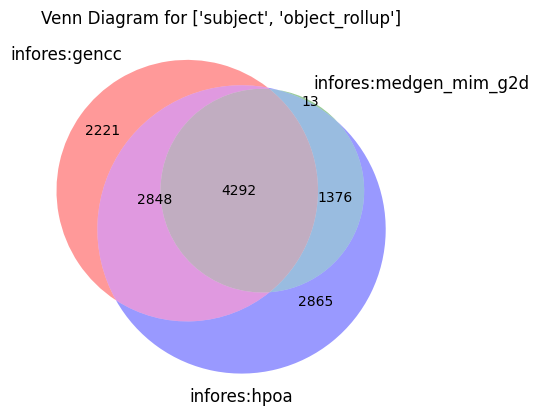

In [31]:
make_venn(["subject", "object_rollup"])

In [15]:
cross_tab = pd.crosstab(df[df['primary_knowledge_source']=="infores:gencc"]['object'], df[df['primary_knowledge_source']=="infores:medgen_mim_g2d"]['object'])

In [16]:
cross_tab

object
object


In [11]:
gencc = df[df['primary_knowledge_source']=="infores:gencc"]
gencc

,subject,predicate,object,primary_knowledge_source
5837,HGNC:10896,NaN,MONDO:0008426,infores:gencc
5838,HGNC:16636,NaN,MONDO:0008233,infores:gencc
5839,HGNC:16636,NaN,MONDO:0007308,infores:gencc
5840,HGNC:17939,NaN,MONDO:0044322,infores:gencc
5841,HGNC:11071,NaN,MONDO:0014572,infores:gencc
...,...,...,...,...
16089,HGNC:17625,NaN,MONDO:0100284,infores:gencc
16090,HGNC:13128,NaN,MONDO:0100148,infores:gencc
16091,HGNC:13156,NaN,MONDO:0100284,infores:gencc
16092,HGNC:29046,NaN,MONDO:0030695,infores:gencc


In [12]:
medgen = df[df['primary_knowledge_source']=="infores:medgen_mim_g2d"]
medgen

,subject,predicate,object,primary_knowledge_source
0,HGNC:1952,biolink:gene_associated_with_condition,MONDO:0007032,infores:medgen_mim_g2d
1,HGNC:29216,biolink:gene_associated_with_condition,MONDO:0024506,infores:medgen_mim_g2d
2,HGNC:3690,biolink:gene_associated_with_condition,MONDO:0007037,infores:medgen_mim_g2d
3,HGNC:7773,biolink:gene_associated_with_condition,MONDO:0007039,infores:medgen_mim_g2d
4,HGNC:3689,biolink:gene_associated_with_condition,MONDO:0007041,infores:medgen_mim_g2d
...,...,...,...,...
5832,HGNC:11016,biolink:gene_associated_with_condition,OMIM:620306,infores:medgen_mim_g2d
5833,HGNC:10485,biolink:gene_associated_with_condition,OMIM:620310,infores:medgen_mim_g2d
5834,HGNC:15979,biolink:gene_associated_with_condition,OMIM:620311,infores:medgen_mim_g2d
5835,HGNC:19946,biolink:gene_associated_with_condition,OMIM:620316,infores:medgen_mim_g2d


In [13]:
pd.crosstab(df)

TypeError: crosstab() missing 1 required positional argument: 'columns'

In [ ]:
!pip install matplotlib-venn